In [57]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.dates as mdates


from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
my_year_month_fmt = mdates.DateFormatter('%y/%m/%d')

In [58]:
df = pd.read_csv('BrentOilPrices.csv',
                                      parse_dates=['Date'],
                                      index_col= ['Date'],
                                     na_values=['999.99'])


#df = pd.read_csv('BrentOilPrices.csv', sep = ",")

In [59]:
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [60]:
df = df['1999-10-05':'2019-09-30']  # October 5, 1999 to 2019-09-30

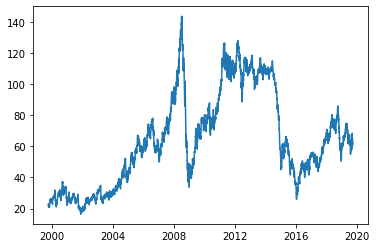

In [61]:
plt.plot(df)
plt.show()

In [62]:
df

,Price
Date,
1999-10-05,22.64
1999-10-06,23.07
1999-10-07,22.33
1999-10-08,20.78
1999-10-11,20.84
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


In [63]:
'''
b)	Build explanatory variables — the features we are going to use to predict the price of oil. 
The variables we will be using at this stage, are the moving averages for the past three (MA3) and 
nine days (MA9), based on input from the oil stock market.
'''
short_rolling = df.rolling(window=3).mean()
long_rolling = df.rolling(window=9).mean()
df = df.assign(MA9=long_rolling)
df = df.assign(MA3=short_rolling)

In [64]:
'''
Remove the first 8 rows
'''
df = df.iloc[8: , :]
df.head(15)

,Price,MA9,MA3
Date,,,
1999-10-15,21.65,21.971111,22.063333
1999-10-18,22.26,21.928889,22.063333
1999-10-19,21.59,21.764444,21.833333
1999-10-20,21.02,21.618889,21.623333
1999-10-21,21.68,21.718889,21.430000
1999-10-22,22.38,21.890000,21.693333
1999-10-25,22.45,21.952222,22.170000
1999-10-26,22.14,21.938889,22.323333
1999-10-27,22.18,21.927778,22.256667


Text(0.5, 0, 'date')

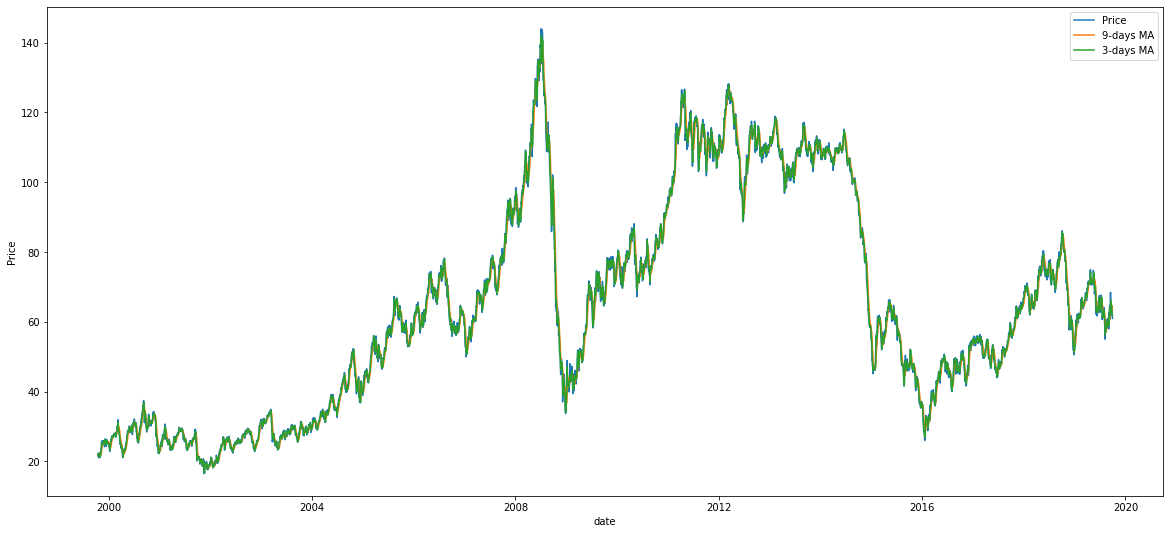

In [65]:


fig, ax = plt.subplots(figsize=(20,9))

ax.plot(df['Price'], label='Price')

ax.plot(df['MA9'], label='9-days MA')
ax.plot(df['MA3'], label='3-days MA')




ax.legend(loc='upper right')
ax.set_ylabel('Price')
ax.set_xlabel("date")
#ax.xaxis.set_major_formatter(my_year_month_fmt)

In [10]:
'''
c)	Define the Train and Test Data: This step covers the preparation of 
the train data and the test data.
'''

'\nc)\tDefine the Train and Test Data: This step covers the preparation of \nthe train data and the test data.\n'

In [11]:
X = df[['MA9', 'MA3']].values   		
y = df['Price'].values


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [67]:
'''
d)	Build a Linear Regression Model (LR) using the moving averages
for the past three (MA3) and nine days (MA9) as inputs;
'''
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
'''
e)	Prediction Function and Result:  In this step, run the model using the test data 
we defined in step four. Visualise the predicted versus the actual stock values for 
the specific time period and calculate the model’s accuracy
'''
y_pred=model.predict(X_test)


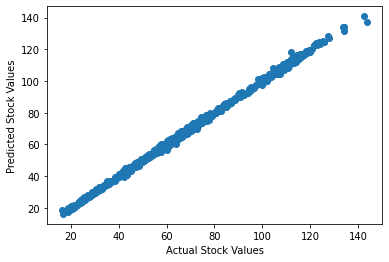

In [69]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Visualize the predicted versus the actual stock values

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Stock Values")
plt.ylabel("Predicted Stock Values")
plt.show()



In [17]:
print(len(y_pred))


1014


In [18]:
'''
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
#Lm = Lasso()
visualizer = PredictionError(regressor) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")
'''

'\nfrom yellowbrick.regressor import PredictionError\n# Instantiate the linear model and visualizer\n#Lm = Lasso()\nvisualizer = PredictionError(regressor) \n# fit visualizer on training data\nvisualizer.fit(X_train, y_train) \n#Evaluate on test data\nvisualizer.score(X_test, y_test)\n#show the plot and save in given path\nvisualizer.show("prediction_error.jpg")\n'

In [19]:
'''
RMSE(to calculate the accuracy of model)
'''
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
'''The root mean square error (RMSE) '''
print("The root mean square error (RMSE):", rmse)




Mean Absolute Error: 0.6524405978219067
Coefficient of Determination: 0.9990849969942788
The root mean square error (RMSE): 0.9105721530541292


In [21]:
'''
f)	Calculate the alpha and betas value: Define the linear regression equation using the alpha and betas values
'''

print(model.intercept_, model.coef_)

0.04684170366331841 [-0.22052268  1.21979486]


In [22]:
'''
Visualise the predicted versus the actual stock values for 
the specific time period and calculate the model’s accuracy.


Also from 2019-09-30 if we substratct 20 years, we will have Thursday, 30 September 1999


X is  the instance ID (each raw)
Y 1 is the actual output values that correspond to each x-row (test instance)
Y 2 is the predicted output values that correspond to each x-row (test instance)
---------------------------



There is also another way, where your Y-Axis is the predicted value and your X-axis 
is your actual value. It all depends on what insights you want to show.

 
'''


df

,Price,MA9,MA3
Date,,,
1999-10-15,21.65,21.971111,22.063333
1999-10-18,22.26,21.928889,22.063333
1999-10-19,21.59,21.764444,21.833333
1999-10-20,21.02,21.618889,21.623333
1999-10-21,21.68,21.718889,21.430000
...,...,...,...
2019-09-24,64.13,64.286667,64.673333
2019-09-25,62.41,64.470000,63.733333
2019-09-26,62.08,64.562222,62.873333


In [24]:
'''

Create a new data frame

'''
new2 = np.array([y_test, y_pred])
#arr1 = np.concatenate((y_test, y_pred))


In [25]:
new2

array([[ 32.35      , 112.04      ,  22.58      , ...,  71.25      ,
        107.37      ,  64.25      ],
       [ 32.5842981 , 111.78396666,  22.09230419, ...,  73.29939829,
        107.31603184,  64.41409102]])

In [26]:
df7 = pd.DataFrame(new2)

In [27]:
df7

,0,1,2,3,4,5,6,7,8,9,...,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013
0,32.350000,112.040000,22.580000,109.07000,24.730000,28.450000,48.160000,68.560000,52.250000,105.710000,...,25.200000,77.600000,33.410000,53.080000,73.100000,47.770000,134.290000,71.250000,107.370000,64.250000
1,32.584298,111.783967,22.092304,108.96938,24.014829,28.947076,48.702883,68.972282,51.649489,105.942477,...,25.602787,75.616264,32.985541,52.694925,74.036719,47.840254,134.300148,73.299398,107.316032,64.414091


In [28]:
my_pd=pd.DataFrame(data=df7).T 
my_pd.columns=['y_test','y_pred']
print(my_pd)

      y_test      y_pred
0      32.35   32.584298
1     112.04  111.783967
2      22.58   22.092304
3     109.07  108.969380
4      24.73   24.014829
...      ...         ...
1009   47.77   47.840254
1010  134.29  134.300148
1011   71.25   73.299398
1012  107.37  107.316032
1013   64.25   64.414091

[1014 rows x 2 columns]


In [29]:
my_pd

,y_test,y_pred
0,32.35,32.584298
1,112.04,111.783967
2,22.58,22.092304
3,109.07,108.969380
4,24.73,24.014829
...,...,...
1009,47.77,47.840254
1010,134.29,134.300148
1011,71.25,73.299398
1012,107.37,107.316032


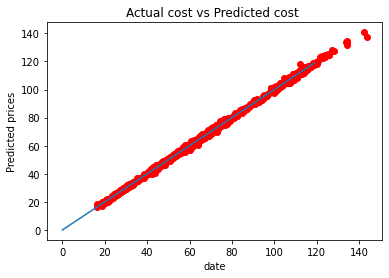

In [35]:

#Why do we plot y_test against y_predict ? 
#Why not x_test against y_predict? 
plt.scatter(my_pd['y_test'], my_pd['y_pred'], color='red')
plt.plot(range(120), range(120))

plt.xlabel("date")
plt.ylabel("Predicted prices")
plt.title("Actual cost vs Predicted cost ")

plt.show()

In [36]:
"""
Predicting the Brent oil price Stock with LSTM Neural Networks  

Task B

"""

'\nPredicting the Brent oil price Stock with LSTM Neural Networks  \n\nTask B\n\n'

In [37]:
'''
a.	Define the Train and Test Data: This step covers the preparation of the train data
 and the test data. Explain the techniques used to generate the train data and the test 
 data for the given Brent oil price time series data set.
'''

'\na.\tDefine the Train and Test Data: This step covers the preparation of the train data\n and the test data. Explain the techniques used to generate the train data and the test \n data for the given Brent oil price time series data set.\n'

In [38]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.dates as mdates


from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
my_year_month_fmt = mdates.DateFormatter('%y/%m/%d')

In [39]:
df = pd.read_csv('BrentOilPrices.csv')
#df = pd.read_csv('BrentOilPrices (1).csv',  usecols=[1], engine='python')

In [40]:
'''
 last day= 2019-09-30	
Substracting 20 years from it will give us October 5, 1999
'''
df = pd.read_csv('BrentOilPrices.csv',
                                       parse_dates=['Date'],
                                       index_col= ['Date'],
                                       na_values=['999.99'])

'''
['2005-05-01':'2005-08-31']
df'''

"\n['2005-05-01':'2005-08-31']\ndf"

In [ ]:
df = df['1999-10-05':'2019-09-30']  # October 5, 1999 to 2019-09-30

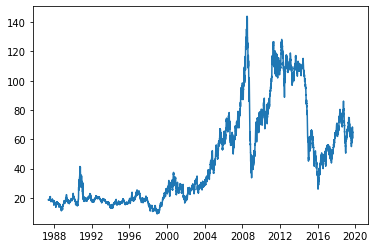

In [42]:
plt.plot(df)
plt.show()

In [43]:
# fix random seed for reproducibility
np.random.seed(1)


In [44]:
dataset1 = df.values
dataset1 = df.astype('float32')


In [45]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1)


In [46]:
# split into train and test sets
train_size = int(len(dataset1) * 0.70)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))


5751 2465


In [70]:
# convert an array of values into a dataset matrix
def create_dataset(dataset1, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset1)-look_back-1):
		a = dataset1[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset1[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [71]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [72]:


# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [50]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=3, batch_size=1, verbose=2)


Epoch 1/3
5749/5749 - 13s - loss: 0.0053 - 13s/epoch - 2ms/step
Epoch 2/3
5749/5749 - 12s - loss: 6.9530e-05 - 12s/epoch - 2ms/step
Epoch 3/3
5749/5749 - 14s - loss: 7.1284e-05 - 14s/epoch - 2ms/step


In [52]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


77/77 [==============================] - 0s 2ms/step
Train Score: 1.05 RMSE
Test Score: 1.48 RMSE


In [53]:
"""
We can see that the model has an average error of about $1.53
on the training dataset, and about $1.42 on the test dataset
"""

'\nWe can see that the model has an average error of about $1.53\non the training dataset, and about $1.42 on the test dataset\n'

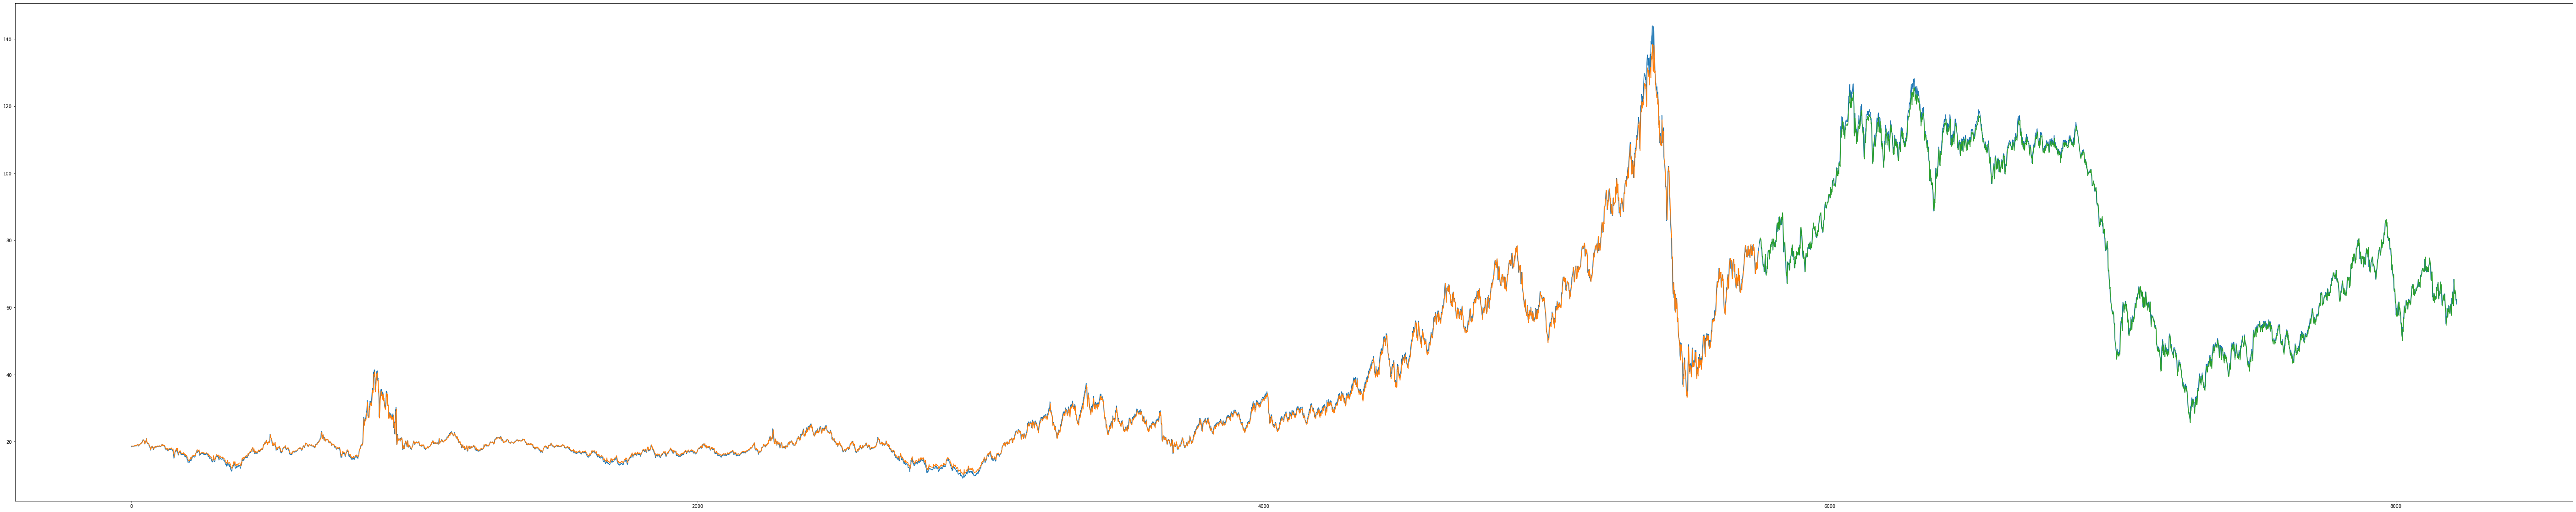

In [73]:
fig, ax = plt.subplots(figsize=(100,20))
# shift train predictions for plotting
trainPredictPlot= np.empty_like(dataset1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset1)-1, :] = testPredict
# plot baseline and predictions
ax.plot(scaler.inverse_transform(dataset1),label='original dataset ')  #blue
ax.plot(trainPredictPlot, label='predictions for the training dataset')   #orange
ax.plot(testPredictPlot, label='predictions on the unseen test dataset ')     # green

